# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the dataset

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA


# Firstly Drops RowNumber,CustomerId,Surname these columns

In [4]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [5]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# to see statistical caracteristic
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

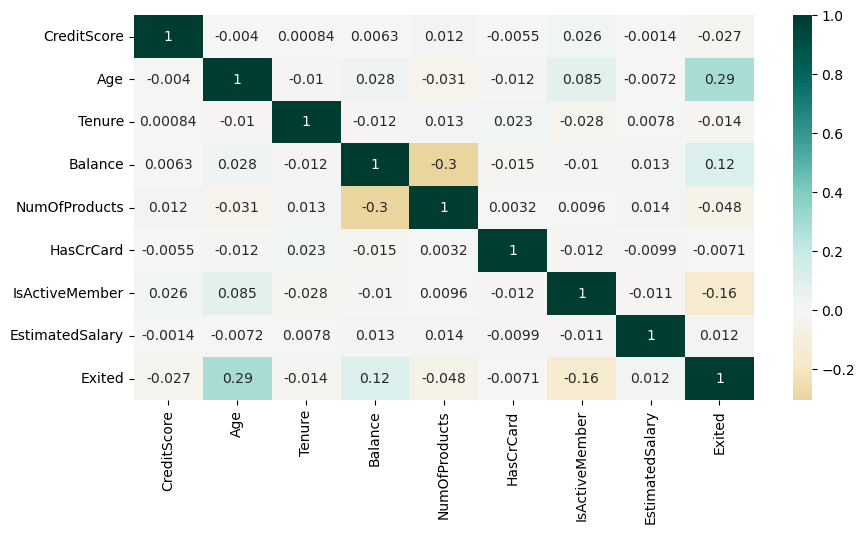

In [13]:
import seaborn as sns
#Calculating correlation between each pair of variables
corr_matrix=df.corr()
 
#Creating a seaborn heatmap
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True)

### Features Selecting

In [14]:
df.drop(columns = ['Balance' , 'HasCrCard' , 'IsActiveMember','Geography'], inplace= True )

In [15]:
df.describe()

,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,4.000000,199992.480000,1.000000


In [16]:
df.describe(include='O')

,Gender
count,10000
unique,2
top,Male
freq,5457


# DataBinning Age

In [17]:
# # DataBinning Age
# def binningFunction(col, cut_points, labels=None):
#     minval = col.min()
#     maxval = col.max()
#     break_points = [minval] + cut_points + [maxval]
#     print(break_points)
#     if not labels:
        
#         labels = range(len(cut_points)+1)
#         print(labels)
    
#     print(labels)
    
#     colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
#     return colBin

In [18]:
# cut_points = [30,54]
# labels = ["Young","Senior","lateSenior"]
# df["Age_category"]= binningFunction(df['Age'], cut_points,labels)
# df

In [19]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [20]:
# df.drop(columns=['Age'],inplace=True)

In [21]:
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,EstimatedSalary,Exited
0,619,Female,42,2,1,101348.88,1
1,608,Female,41,1,1,112542.58,0
2,502,Female,42,8,3,113931.57,1
3,699,Female,39,1,2,93826.63,0
4,850,Female,43,2,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,Male,39,5,2,96270.64,0
9996,516,Male,35,10,1,101699.77,0
9997,709,Female,36,7,1,42085.58,1
9998,772,Male,42,3,2,92888.52,1


In [22]:
# change estimated salary to ID
df['New_Estimated_Salary'] = df['EstimatedSalary']/10

In [23]:
df['New_Estimated_Salary'].head()

0    10134.888
1    11254.258
2    11393.157
3     9382.663
4     7908.410
Name: New_Estimated_Salary, dtype: float64

In [24]:
df['New_Estimated_Salary'].describe()

count    10000.000000
mean     10009.023988
std       5751.049282
min          1.158000
25%       5100.211000
50%      10019.391500
75%      14938.824750
max      19999.248000
Name: New_Estimated_Salary, dtype: float64

In [25]:
df.drop(columns=['EstimatedSalary'],inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary
0,619,Female,42,2,1,1,10134.888
1,608,Female,41,1,1,0,11254.258
2,502,Female,42,8,3,1,11393.157
3,699,Female,39,1,2,0,9382.663
4,850,Female,43,2,1,0,7908.410


# DataBinning New_Estimated_Salary

In [26]:
# # DataBinning Age
# def binningFunction(col, cut_points, labels=None):
#     minval = col.min()
#     maxval = col.max()
#     break_points = [minval] + cut_points + [maxval]
#     print(break_points)
#     if not labels:
        
#         labels = range(len(cut_points)+1)
#         print(labels)
    
#     print(labels)
    
#     colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
#     return colBin

In [27]:
# cut_points = [5000,15000]
# labels = ["MenengahKebawah","Menengah","Kaya"]
# df["New_Estimated_Salary"]= binningFunction(df['New_Estimated_Salary'], cut_points,labels)
# df

In [28]:
df["New_Estimated_Salary"].value_counts()

2492.492     2
10134.888    1
5531.344     1
7250.068     1
18269.280    1
            ..
12089.307    1
18837.721    1
5590.293     1
452.374      1
3819.078     1
Name: New_Estimated_Salary, Length: 9999, dtype: int64

In [29]:
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary
0,619,Female,42,2,1,1,10134.888
1,608,Female,41,1,1,0,11254.258
2,502,Female,42,8,3,1,11393.157
3,699,Female,39,1,2,0,9382.663
4,850,Female,43,2,1,0,7908.410
...,...,...,...,...,...,...,...
9995,771,Male,39,5,2,0,9627.064
9996,516,Male,35,10,1,0,10169.977
9997,709,Female,36,7,1,1,4208.558
9998,772,Male,42,3,2,1,9288.852


# DataBinning CreditScore

In [30]:
# df['CreditScore'].describe()

In [31]:
# # DataBinning CreditScore
# def binningFunction(col, cut_points, labels=None):
#     minval = col.min()
#     maxval = col.max()
#     break_points = [minval] + cut_points + [maxval]
#     print(break_points)
#     if not labels:
        
#         labels = range(len(cut_points)+1)
#         print(labels)
    
#     print(labels)
# #     
#     colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
#     return colBin

In [32]:
# cut_points = [652.000000,800.000000]
# labels = ["KurangMampu","Mampu","SangatMampu"]
# df.loc[:,"CreditScore"]= binningFunction(df['CreditScore'], cut_points,labels)
# df

In [33]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

In [34]:
df.head(5)

,CreditScore,Gender,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary
0,619,Female,42,2,1,1,10134.888
1,608,Female,41,1,1,0,11254.258
2,502,Female,42,8,3,1,11393.157
3,699,Female,39,1,2,0,9382.663
4,850,Female,43,2,1,0,7908.410


# Encoding the Categorical data

In [35]:
# one hot encoding use dummies
columns = ['Gender']
dummyData = pd.get_dummies(df[columns])
dummyData

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [36]:
# tambah data use concat
df = pd.concat([df,dummyData],axis=1)
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary,Gender_Female,Gender_Male
0,619,Female,42,2,1,1,10134.888,1,0
1,608,Female,41,1,1,0,11254.258,1,0
2,502,Female,42,8,3,1,11393.157,1,0
3,699,Female,39,1,2,0,9382.663,1,0
4,850,Female,43,2,1,0,7908.410,1,0
...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,2,0,9627.064,0,1
9996,516,Male,35,10,1,0,10169.977,0,1
9997,709,Female,36,7,1,1,4208.558,1,0
9998,772,Male,42,3,2,1,9288.852,0,1


In [37]:
df = df.drop(columns,axis=1)
df.head()

,CreditScore,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary,Gender_Female,Gender_Male
0,619,42,2,1,1,10134.888,1,0
1,608,41,1,1,0,11254.258,1,0
2,502,42,8,3,1,11393.157,1,0
3,699,39,1,2,0,9382.663,1,0
4,850,43,2,1,0,7908.410,1,0


# Convert Ordinal Data to Numeric Data

In [38]:
# # create mapping
# dataMappingCreditScore={
#     "KurangMampu":1,
#     "Mampu":2,
#     "SangatMampu":3
# }

In [39]:
# # ['MenengahKebawah', 'Menengah', 'Kaya', 'KayaRaya']
# dataMappingNew_Estimated_Salary={
#     "Kaya":3,
#     "Menengah":2,
#     "MenengahKebawah":1
# }

In [40]:
# # ['Young', 'Senior', 'lateSenior']
# dataMappingAge_category={
#     "lateSenior":0,
#     "Senior":2,
#     "Young":1
# }

In [41]:
# df['CreditScore'] = df['CreditScore'].map(dataMappingCreditScore)
# df['New_Estimated_Salary'] = df['New_Estimated_Salary'].map(dataMappingNew_Estimated_Salary)
# df['Age_category'] = df['Age_category'].map(dataMappingAge_category)
# df

# Manipulating Column Exited

In [42]:
df['Accepted'] = pd.read_csv('label.csv')

In [43]:
data = pd.read_csv('label.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   New_Accepted  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [44]:
# df['Accepted'] = np.where(df['Accepted'] == 0, 1, 0)
df

,CreditScore,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary,Gender_Female,Gender_Male,Accepted
0,619,42,2,1,1,10134.888,1,0,0
1,608,41,1,1,0,11254.258,1,0,0
2,502,42,8,3,1,11393.157,1,0,0
3,699,39,1,2,0,9382.663,1,0,1
4,850,43,2,1,0,7908.410,1,0,1
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,2,0,9627.064,0,1,1
9996,516,35,10,1,0,10169.977,0,1,0
9997,709,36,7,1,1,4208.558,1,0,0
9998,772,42,3,2,1,9288.852,0,1,1


In [45]:
df.dtypes

CreditScore               int64
Age                       int64
Tenure                    int64
NumOfProducts             int64
Exited                    int64
New_Estimated_Salary    float64
Gender_Female             uint8
Gender_Male               uint8
Accepted                  int64
dtype: object

In [46]:
df['Accepted'].value_counts()

0    6578
1    3422
Name: Accepted, dtype: int64

In [47]:
sum(df['Accepted'].isnull())

0

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Tenure                10000 non-null  int64  
 3   NumOfProducts         10000 non-null  int64  
 4   Exited                10000 non-null  int64  
 5   New_Estimated_Salary  10000 non-null  float64
 6   Gender_Female         10000 non-null  uint8  
 7   Gender_Male           10000 non-null  uint8  
 8   Accepted              10000 non-null  int64  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 644.5 KB


In [50]:
df['Accepted'].value_counts()

0    6578
1    3422
Name: Accepted, dtype: int64

# Removing Outlier


In [51]:
# New_Estimated_Salary
df['New_Estimated_Salary'].max()


19999.248

In [52]:
df['New_Estimated_Salary'].min()

1.158

In [53]:
# TO Identify outlier
# use Quantile

LowerLimit = df['New_Estimated_Salary'].quantile(0.05) # 0.05 is 5%
LowerLimit

985.1818500000003

In [54]:
UpperLimit = df['New_Estimated_Salary'].quantile(0.95) # 0.05 is 5%
UpperLimit

19015.537549999997

In [55]:
df[df['New_Estimated_Salary'] < LowerLimit]


,CreditScore,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary,Gender_Female,Gender_Male,Accepted
16,653,58,1,1,1,509.767,0,1,0
23,669,46,3,2,0,848.775,0,1,0
58,511,66,4,1,1,164.311,1,0,0
84,493,46,4,2,0,190.766,1,0,0
99,413,34,9,2,0,653.418,0,1,0
...,...,...,...,...,...,...,...,...,...
9928,611,38,4,2,0,244.429,0,1,0
9943,784,23,2,1,0,684.773,0,1,0
9954,645,45,6,1,0,344.922,0,1,0
9979,677,58,1,1,0,298.828,1,0,0


In [56]:
df[df['New_Estimated_Salary'] > UpperLimit]


,CreditScore,Age,Tenure,NumOfProducts,Exited,New_Estimated_Salary,Gender_Female,Gender_Male,Accepted
13,549,25,5,2,0,19085.779,1,0,0
43,834,49,2,1,1,19436.576,1,0,1
49,776,37,2,2,0,19409.912,1,0,1
50,698,44,10,2,0,19805.916,0,1,1
67,735,43,10,2,0,19667.328,0,1,1
...,...,...,...,...,...,...,...,...,...
9906,579,38,4,1,0,19313.055,1,0,0
9923,725,29,6,2,0,19077.683,1,0,1
9975,610,50,1,2,1,19652.655,0,1,0
9978,774,40,9,2,0,19160.897,0,1,1


In [57]:
# df = df[(df['New_Estimated_Salary'] > LowerLimit) & (df['New_Estimated_Salary'] < UpperLimit)]

df = df[(df['New_Estimated_Salary'] > LowerLimit)]


In [58]:
df['New_Estimated_Salary'].describe()


count     9500.000000
mean     10510.125235
std       5457.880885
min        985.472000
25%       5816.203500
50%      10457.218500
75%      15189.106500
max      19999.248000
Name: New_Estimated_Salary, dtype: float64

In [59]:
df.dtypes

CreditScore               int64
Age                       int64
Tenure                    int64
NumOfProducts             int64
Exited                    int64
New_Estimated_Salary    float64
Gender_Female             uint8
Gender_Male               uint8
Accepted                  int64
dtype: object

In [60]:
df.drop(columns=['Exited'],inplace=True)
df.head(5)

C:\Users\BISMILLAH NAWAITU\AppData\Local\Temp\ipykernel_9396\857995861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Exited'],inplace=True)


,CreditScore,Age,Tenure,NumOfProducts,New_Estimated_Salary,Gender_Female,Gender_Male,Accepted
0,619,42,2,1,10134.888,1,0,0
1,608,41,1,1,11254.258,1,0,0
2,502,42,8,3,11393.157,1,0,0
3,699,39,1,2,9382.663,1,0,1
4,850,43,2,1,7908.410,1,0,1


In [61]:
X=df.drop(columns=['Accepted'])
y=df['Accepted']

In [62]:
X.head(10)

,CreditScore,Age,Tenure,NumOfProducts,New_Estimated_Salary,Gender_Female,Gender_Male
0,619,42,2,1,10134.888,1,0
1,608,41,1,1,11254.258,1,0
2,502,42,8,3,11393.157,1,0
3,699,39,1,2,9382.663,1,0
4,850,43,2,1,7908.410,1,0
5,645,44,8,2,14975.671,0,1
6,822,50,7,2,1006.280,0,1
7,376,29,4,4,11934.688,1,0
8,501,44,4,2,7494.050,0,1
9,684,27,2,1,7172.573,0,1


In [63]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    1
Name: Accepted, dtype: int64

# Split the dataset into train test split using sklearn lib

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [66]:
# for next scaling
X_train.to_csv('X_train.csv', index= False)

# Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc = sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [68]:
X_train

array([[0.368     , 0.45945946, 0.1       , ..., 0.4953287 , 0.        ,
        1.        ],
       [0.64      , 0.17567568, 0.9       , ..., 0.34922106, 1.        ,
        0.        ],
       [0.624     , 0.35135135, 0.8       , ..., 0.87021195, 0.        ,
        1.        ],
       ...,
       [0.8       , 0.22972973, 0.3       , ..., 0.95544294, 1.        ,
        0.        ],
       [0.398     , 0.27027027, 0.8       , ..., 0.77621631, 1.        ,
        0.        ],
       [0.414     , 0.32432432, 0.4       , ..., 0.40385276, 0.        ,
        1.        ]])

In [69]:
X_test

array([[0.384     , 0.09459459, 0.8       , ..., 0.23413366, 0.        ,
        1.        ],
       [0.812     , 0.24324324, 0.2       , ..., 0.84247984, 0.        ,
        1.        ],
       [0.526     , 0.2972973 , 0.7       , ..., 0.96485233, 0.        ,
        1.        ],
       ...,
       [0.574     , 0.2027027 , 0.5       , ..., 0.68420102, 0.        ,
        1.        ],
       [0.328     , 0.36486486, 0.3       , ..., 0.7655107 , 1.        ,
        0.        ],
       [0.898     , 0.45945946, 0.4       , ..., 0.41668046, 1.        ,
        0.        ]])

# Building Model
In this part, we model our Artificial Neural Network model

In [71]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [72]:
# initializing the ANN model
classifier=Sequential()

In [73]:
classifier.add(Dense(64, activation = 'relu',input_dim=7))
classifier.add(Dense(32,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [74]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [77]:
ACCURACY_THRESHOLD = 0.99

In [78]:
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
class myCallback(keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

In [79]:
callbacks = myCallback()

In [80]:
history = classifier.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,callbacks = [callbacks],validation_split=0.25)

Epoch 1/100
535/535 [==============================] - 7s 5ms/step - loss: 0.4333 - accuracy: 0.8055 - val_loss: 0.2898 - val_accuracy: 0.8799
Epoch 2/100
535/535 [==============================] - 3s 5ms/step - loss: 0.2309 - accuracy: 0.9072 - val_loss: 0.1971 - val_accuracy: 0.9304
Epoch 3/100
535/535 [==============================] - 3s 5ms/step - loss: 0.1794 - accuracy: 0.9328 - val_loss: 0.1594 - val_accuracy: 0.9416
Epoch 4/100
535/535 [==============================] - 3s 5ms/step - loss: 0.1534 - accuracy: 0.9433 - val_loss: 0.1390 - val_accuracy: 0.9545
Epoch 5/100
535/535 [==============================] - 3s 5ms/step - loss: 0.1339 - accuracy: 0.9515 - val_loss: 0.1336 - val_accuracy: 0.9428
Epoch 6/100
535/535 [==============================] - 3s 5ms/step - loss: 0.1191 - accuracy: 0.9596 - val_loss: 0.1285 - val_accuracy: 0.9416
Epoch 7/100
535/535 [==============================] - 3s 5ms/step - loss: 0.1046 - accuracy: 0.9654 - val_loss: 0.1055 - val_accuracy: 0.9607

Epoch 58/100
535/535 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9880 - val_loss: 0.0332 - val_accuracy: 0.9854
Epoch 59/100
535/535 [==============================] - 2s 4ms/step - loss: 0.0362 - accuracy: 0.9858 - val_loss: 0.0264 - val_accuracy: 0.9899
Epoch 60/100
535/535 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9891 - val_loss: 0.0248 - val_accuracy: 0.9899
Epoch 61/100
535/535 [==============================] - 3s 6ms/step - loss: 0.0315 - accuracy: 0.9867 - val_loss: 0.0256 - val_accuracy: 0.9877
Epoch 62/100
535/535 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9876 - val_loss: 0.0478 - val_accuracy: 0.9759
Epoch 63/100
531/535 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9906
Reached 99.00% accuracy, so stopping training!!
535/535 [==============================] - 2s 5ms/step - loss: 0.0270 - accuracy: 0.9906 - val_loss: 0.0334 - val_accuracy: 0.9888


In [81]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


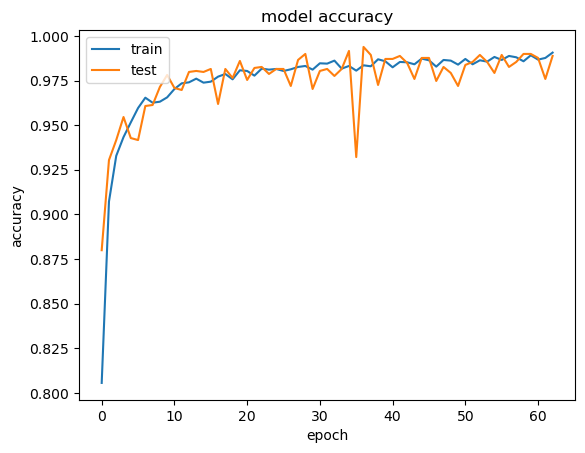

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

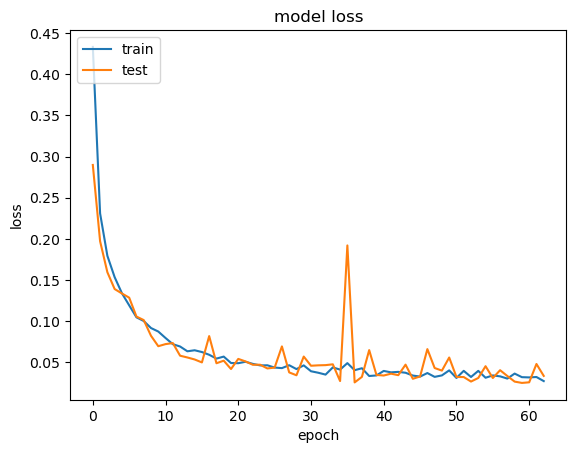

In [83]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction and Accuracy Result

In [84]:
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

75/75 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

# Confusion metrics

In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1566,    2],
       [  33,  774]], dtype=int64)

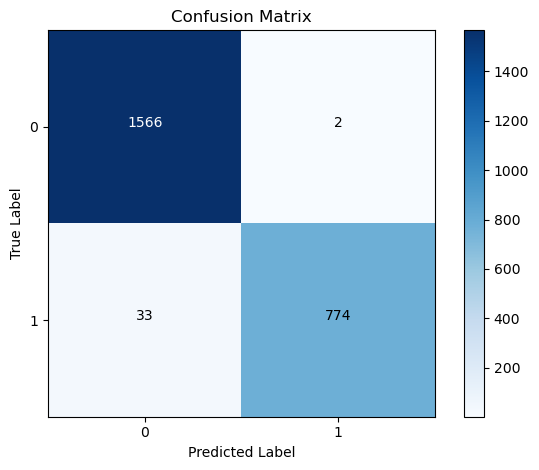

In [86]:
# Membuat plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Menampilkan label pada setiap cell confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Score

In [86]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9654736842105263

In [87]:
X_test[:10]

array([[0.384     , 0.09459459, 0.8       , 0.        , 0.23413366,
        0.        , 1.        ],
       [0.812     , 0.24324324, 0.2       , 0.        , 0.84247984,
        0.        , 1.        ],
       [0.526     , 0.2972973 , 0.7       , 0.        , 0.96485233,
        0.        , 1.        ],
       [0.32      , 0.35135135, 0.6       , 0.33333333, 0.87128191,
        0.        , 1.        ],
       [0.726     , 0.27027027, 0.6       , 0.33333333, 0.34808267,
        0.        , 1.        ],
       [0.844     , 0.22972973, 0.9       , 0.        , 0.08201206,
        1.        , 0.        ],
       [0.398     , 0.09459459, 0.5       , 0.33333333, 0.95195752,
        1.        , 0.        ],
       [0.768     , 0.36486486, 0.2       , 0.33333333, 0.47196601,
        0.        , 1.        ],
       [0.244     , 0.18918919, 0.1       , 0.        , 0.24965299,
        1.        , 0.        ],
       [0.462     , 0.33783784, 0.9       , 0.        , 0.10943744,
        0.        , 1. 

In [89]:
y[:10]

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    1
Name: Accepted, dtype: int64

In [90]:
len(y_pred)

2375

In [91]:
len(y_test)

2375

In [103]:
prediction = classifier.predict([sc.transform([[850,43,2,1,7908.410,1,0]])])
prediction[0][0]

1/1 [==============================] - 0s 59ms/step


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.99997014

# Save Model

In [104]:
import joblib

joblib.dump(classifier, 'classifier_dipakai.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-27 12:06:59         1821
metadata.json                                  2023-06-27 12:06:59           64
variables.h5                                   2023-06-27 12:06:59        53728


['classifier_dipakai.pkl']

# Make Server from Flask

In [7]:
from flask import Flask, request, jsonify
import sys
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train_new = pd.read_csv('X_train.csv')
sc = MinMaxScaler()
sc = sc.fit(X_train_new)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        CreditScore = int(request.form.get('CreditScore'))
        Tenure = int(request.form.get('Tenure'))
        NumOfProducts = int(request.form.get('NumOfProducts'))
        Age_category = int(request.form.get('Age'))
        New_Estimated_Salary = float(request.form.get('Estimated_Salary'))
        Gender = request.form.get('Gender')
        if Gender.strip():
            if Gender == 'male':
                Gender_Female = 0
                Gender_Male = 1 
            elif Gender == 'female':
                Gender_Female = 1
                Gender_Male = 0
        else:
            return jsonify({'Error': ["There's No valid input in line."]})
        data = {
            'CreditScore': [CreditScore],
            'Age': [Age_category],
            'Tenure': [Tenure],
            'NumOfProducts': [NumOfProducts],
            'New_Estimated_Salary': [New_Estimated_Salary],
            'Gender_Female': [Gender_Female],
            'Gender_Male': [Gender_Male],
        }
        
        data = pd.DataFrame(data)
        
#       Scaling Data
        datascaled =sc.transform(data)

        classifier = joblib.load('classifier_dipakai.pkl')
        prediction = classifier.predict([datascaled])
        
        Prediction_input = 'Lancar'
        prediksi = 1
        
        if(prediction[0][0] < 0.5):
            prediksi = 0
            Prediction_input = 'Tidak Lancar'
        
        Confident_input = prediction[0][0]
        
        #         Membaca data dari file CSV ke dalam DataFrame
        df = pd.read_csv('HistReqsApi.csv')

#         Membuat dictionary dengan data baru yang akan ditambahkan
        new_data = {
            'CreditScore': [CreditScore],
            'Age_category': [Age_category],
            'Tenure': [Tenure],
            'NumOfProducts': [NumOfProducts],
            'New_Estimated_Salary': [New_Estimated_Salary],
            'Gender_Female': [Gender_Female],
            'Gender_Male': [Gender_Male],
            'Prediction' : [Prediction_input],
            'Confident' : [Confident_input]
        }

#         Menambahkan data baru ke dalam DataFrame
        new_df = pd.concat([df, pd.DataFrame(new_data)])

#         Menampilkan DataFrame setelah penambahan data
        print("\nDataFrame Setelah Penambahan Data:")
        print(new_df)

#         Menyimpan DataFrame ke dalam file CSV
        new_df.to_csv('HistReqsApi.csv', index=False)

        
        return jsonify({'success':200,'status': prediksi,'confidence':str(prediction[0][0])})
    except ValueError:
        print("There's No Valid input in line.")
        return jsonify({'success':0,'Error': "There's No valid input in line."})
    except:
        print("Unexpected error:", sys.exc_info()[0])
        return jsonify({'success':0,'Error': "Unexpected error."})
        raise 

if __name__ == '__main__':
     app.run(host="127.0.0.1",port="5000")

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-27 12:06:58         1821
metadata.json                                  2023-06-27 12:06:58           64
variables.h5                                   2023-06-27 12:06:58        53728
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
1/1 [==============================] - 0s 397ms/step


127.0.0.1 - - [24/Aug/2023 05:54:12] "POST /predict HTTP/1.1" 200 -



DataFrame Setelah Penambahan Data:
  CreditScore Age_category Tenure NumOfProducts  New_Estimated_Salary  \
0         850           39      0             1               12000.0   

  Gender_Female Gender_Male Prediction  Confident  
0             0           1     Lancar   0.999987  
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-27 12:06:58         1821
metadata.json                                  2023-06-27 12:06:58           64
variables.h5                                   2023-06-27 12:06:58        53728
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0

127.0.0.1 - - [24/Aug/2023 05:54:14] "POST /predict HTTP/1.1" 200 -



DataFrame Setelah Penambahan Data:
   CreditScore  Age_category  Tenure  NumOfProducts  New_Estimated_Salary  \
0          850            39       0              1               12000.0   
0          600            39       0              2                3600.0   

   Gender_Female  Gender_Male    Prediction     Confident  
0              0            1        Lancar  9.999872e-01  
0              0            1  Tidak Lancar  1.219779e-14  


In [9]:
 df = pd.read_csv('HistReqsApi.csv')

In [10]:
df

,CreditScore,Age_category,Tenure,NumOfProducts,New_Estimated_Salary,Gender_Female,Gender_Male,Prediction,Confident
0,850,39,0,1,12000.0,0,1,Lancar,9.999872e-01
1,600,39,0,2,3600.0,0,1,Tidak Lancar,1.219779e-14


In [9]:
df.to_excel('data_predict.xlsx', index=True)

In [6]:
from sklearn.preprocessing import MinMaxScaler

X_train_new = pd.read_csv('X_train.csv')
sc = MinMaxScaler()
sc = sc.fit(X_train_new)
data = [[619,42,2,1,10134.888,1,0],
       [850,43,2,1,7908.410 ,1,0  ]]
data = sc.transform(data)
data

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.538     , 0.32432432, 0.2       , 0.        , 0.48119932,
        1.        , 0.        ],
       [1.        , 0.33783784, 0.2       , 0.        , 0.36410117,
        1.        , 0.        ]])